In [3]:
import numpy as np
import arviz as az
import xarray as xr
import matplotlib.pyplot as plt

In [21]:
samples = np.load("../outputs/hyperboloid_samples.npz")

# Variables disponibles
print(list(samples.keys()))

['epsilon', 'kappa', 'tau', 'theta']


In [22]:
posterior = {
    "epsilon": samples["epsilon"],
    "tau": samples["tau"],
    "kappa": samples["kappa"]
}

idata = az.from_dict(
    posterior=posterior,
    coords={"subject": range(samples["tau"].shape[2])},
    dims={"tau": ["subject"], "kappa": ["subject"]}
)

# Resumen tipo summary
print(az.summary(idata, round_to=2))


arviz - WARNING - Array contains NaN-value.


            mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
epsilon[0]   NaN   NaN    0.43      NaN        NaN      NaN       NaN   
epsilon[1]   NaN   NaN    0.45      NaN        NaN      NaN       NaN   
tau[0]      3.21  4.44   -1.93    14.87       0.80     0.63     29.14   
tau[1]      3.14  4.40   -1.86    14.87       0.79     0.63     29.39   
kappa[0]    1.80  2.62    0.00     7.11       0.29     0.15     62.41   
kappa[1]    1.78  2.58    0.00     7.00       0.28     0.15     64.30   

            ess_tail  r_hat  
epsilon[0]       NaN    NaN  
epsilon[1]       NaN    NaN  
tau[0]         31.05   2.73  
tau[1]         31.07   2.64  
kappa[0]      636.91   1.31  
kappa[1]      596.56   1.30  


/home/villanoele/.pyenv/versions/bayesian/lib/python3.10/site-packages/arviz/stats/density_utils.py:488: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")


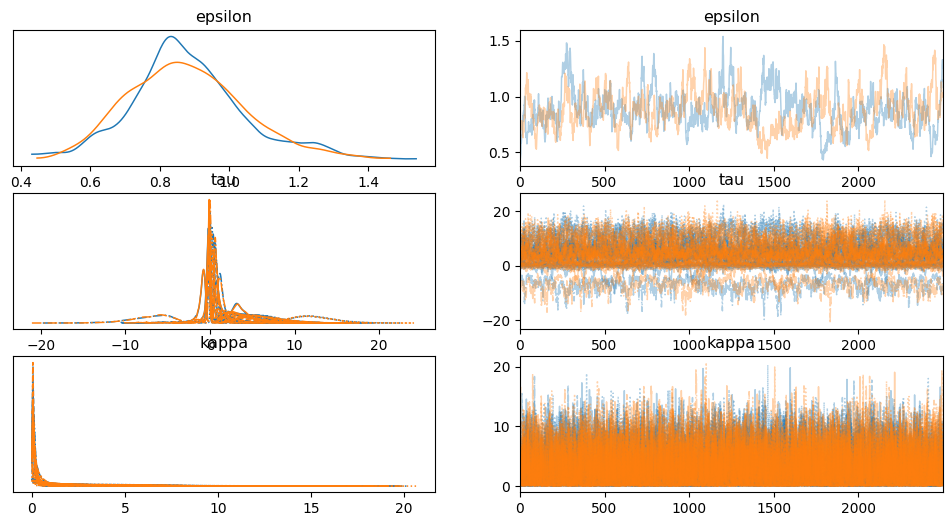

In [23]:
az.plot_trace(idata, var_names=["epsilon", "tau", "kappa"]);
plt.show()


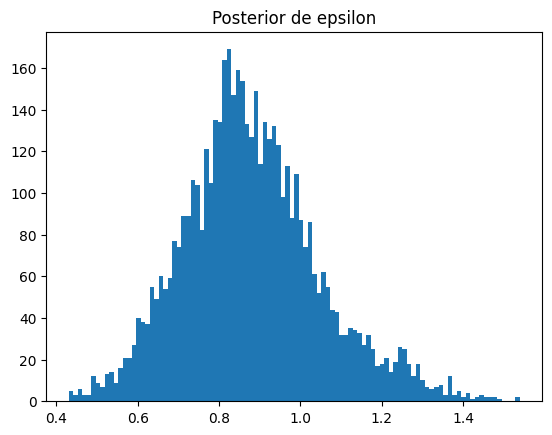

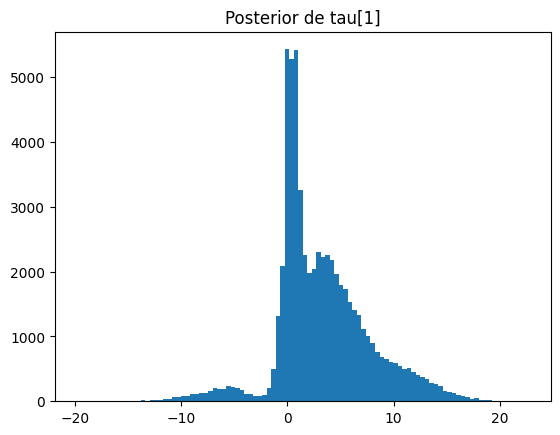

In [24]:
# Histograma de epsilon
plt.hist(samples["epsilon"].flatten(), bins=100)
plt.title("Posterior de epsilon")
plt.show()

# Histograma de tau[0] (primer sujeto)
plt.hist(samples["tau"][:,:,0].flatten(), bins=100)
plt.title("Posterior de tau[1]")
plt.show()


/home/villanoele/.pyenv/versions/bayesian/lib/python3.10/site-packages/arviz/plots/plot_utils.py:270: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (50) in plot_autocorr, generating only 40 plots
  warnings.warn(


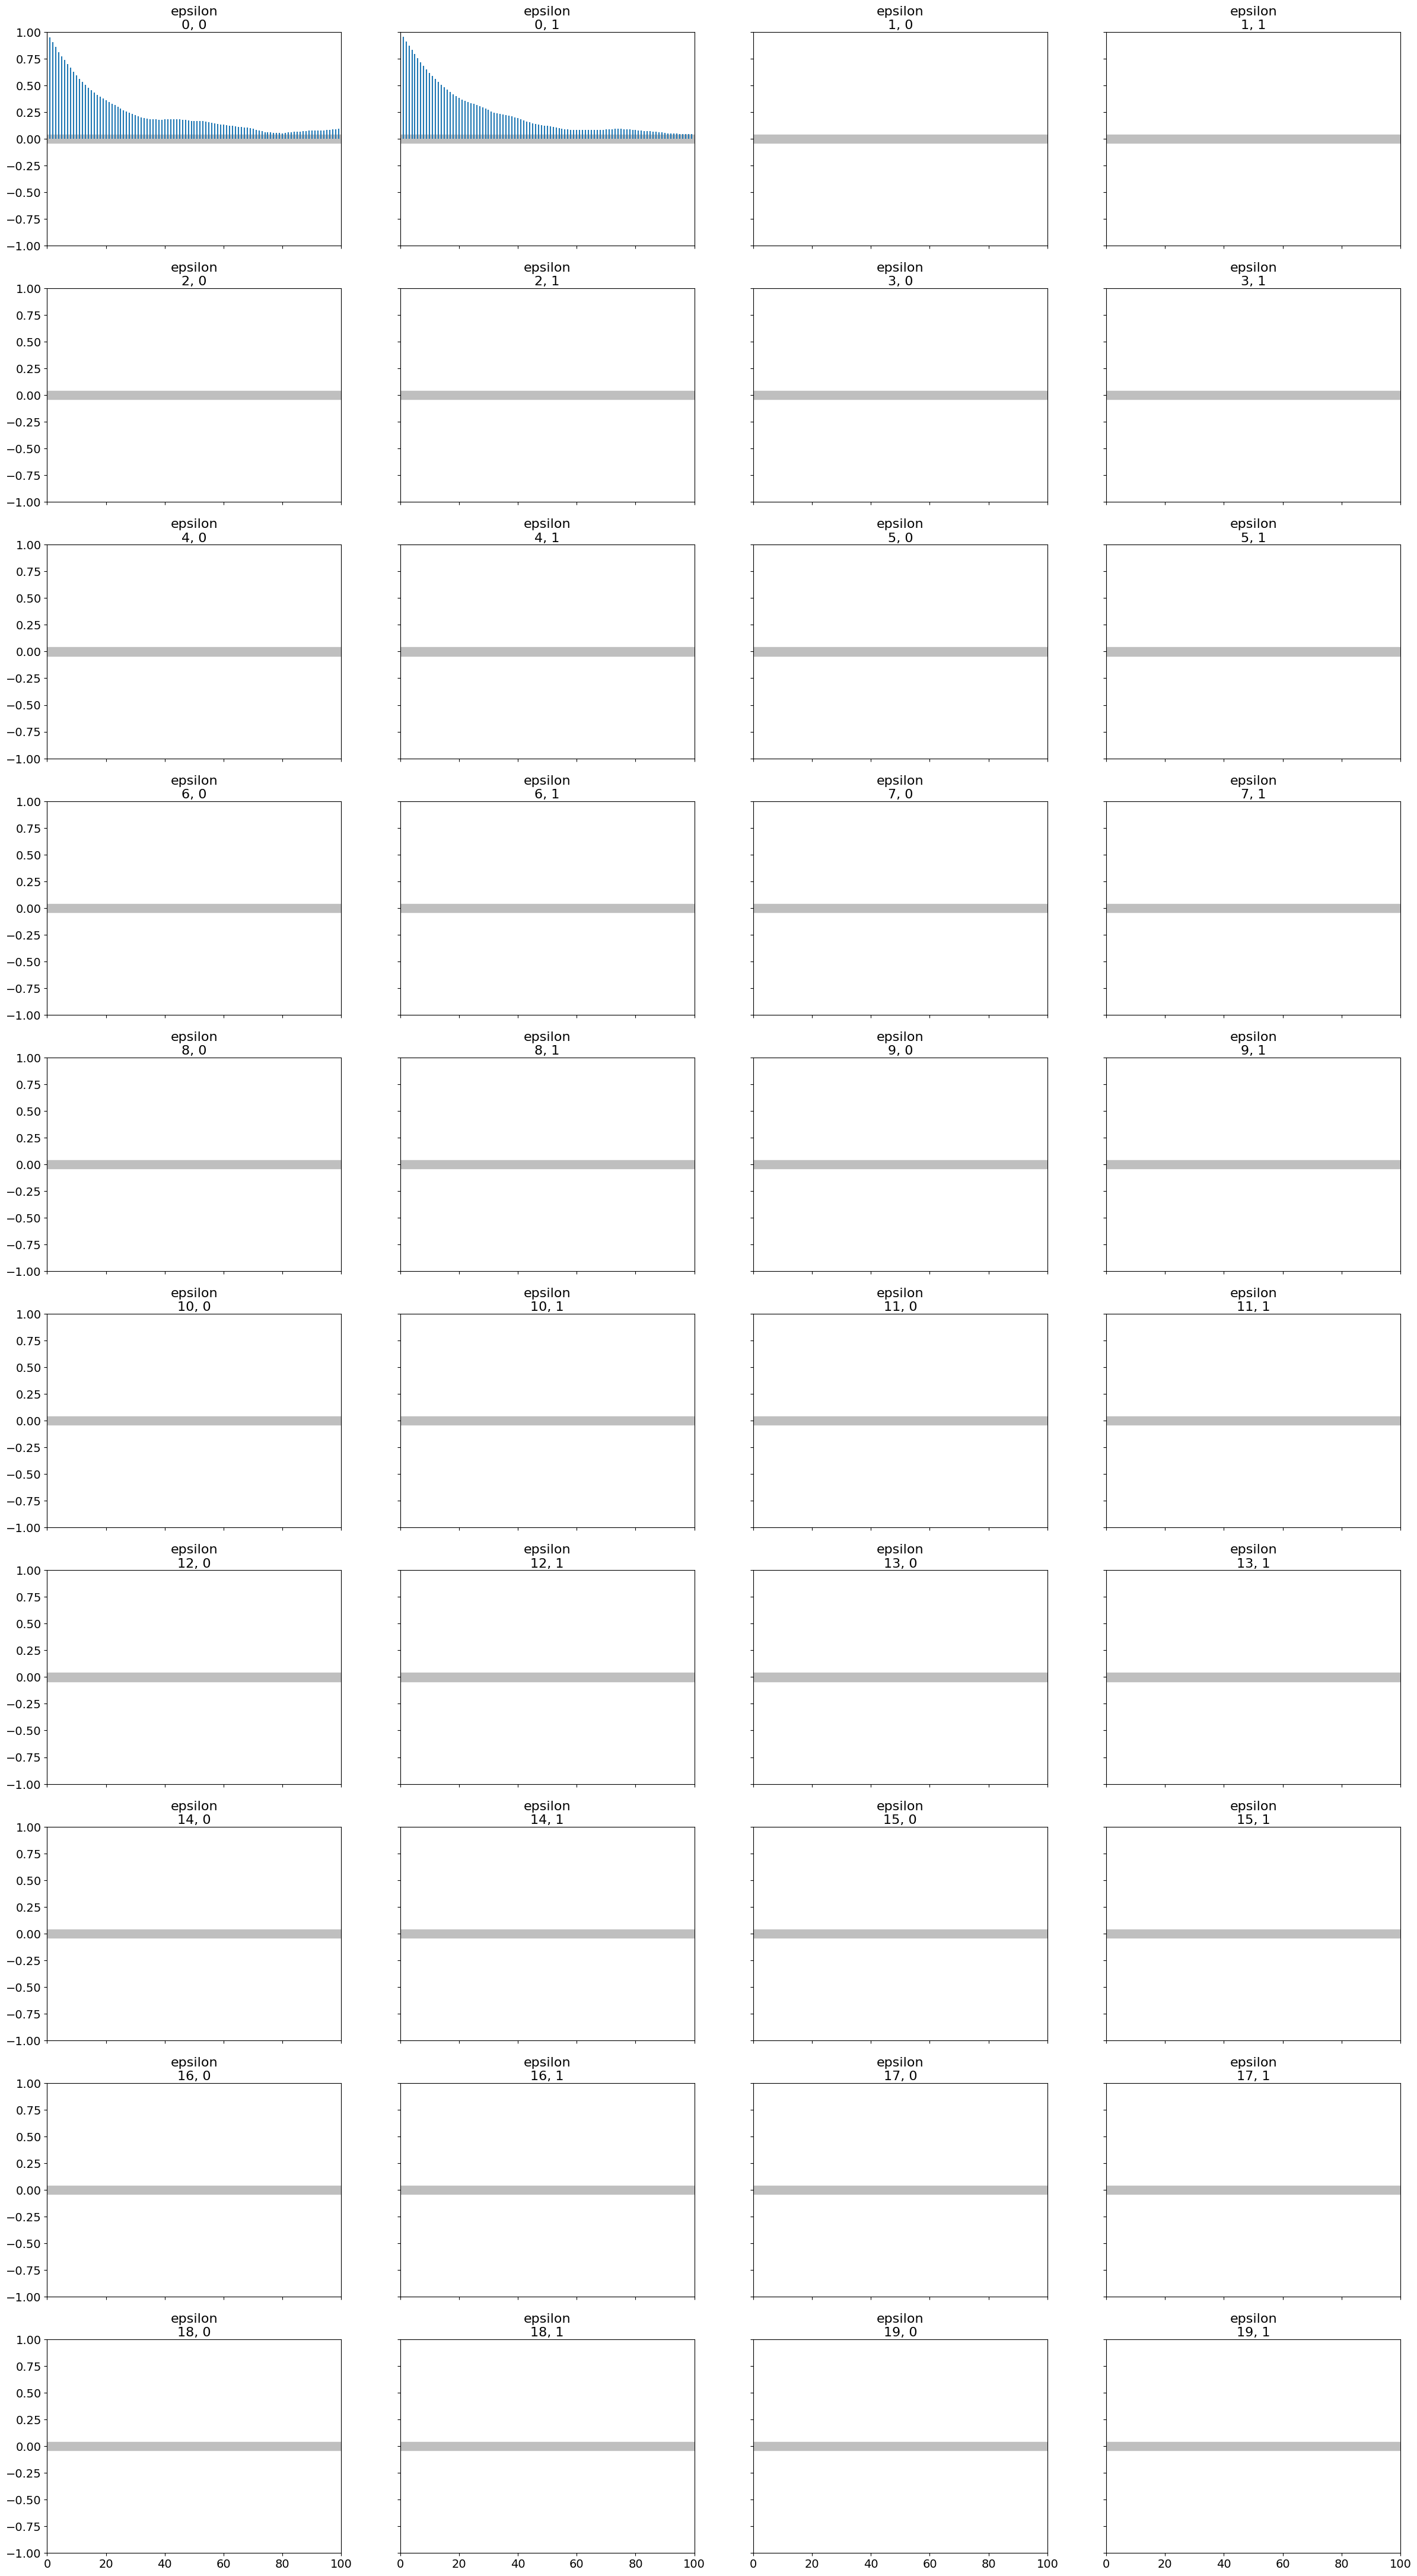

/home/villanoele/.pyenv/versions/bayesian/lib/python3.10/site-packages/arviz/stats/density_utils.py:981: RuntimeWarning: invalid value encountered in divide
  hist_dens = hist / (hist.sum() * np.diff(bin_edges))
/home/villanoele/.pyenv/versions/bayesian/lib/python3.10/site-packages/arviz/stats/density_utils.py:981: RuntimeWarning: invalid value encountered in divide
  hist_dens = hist / (hist.sum() * np.diff(bin_edges))


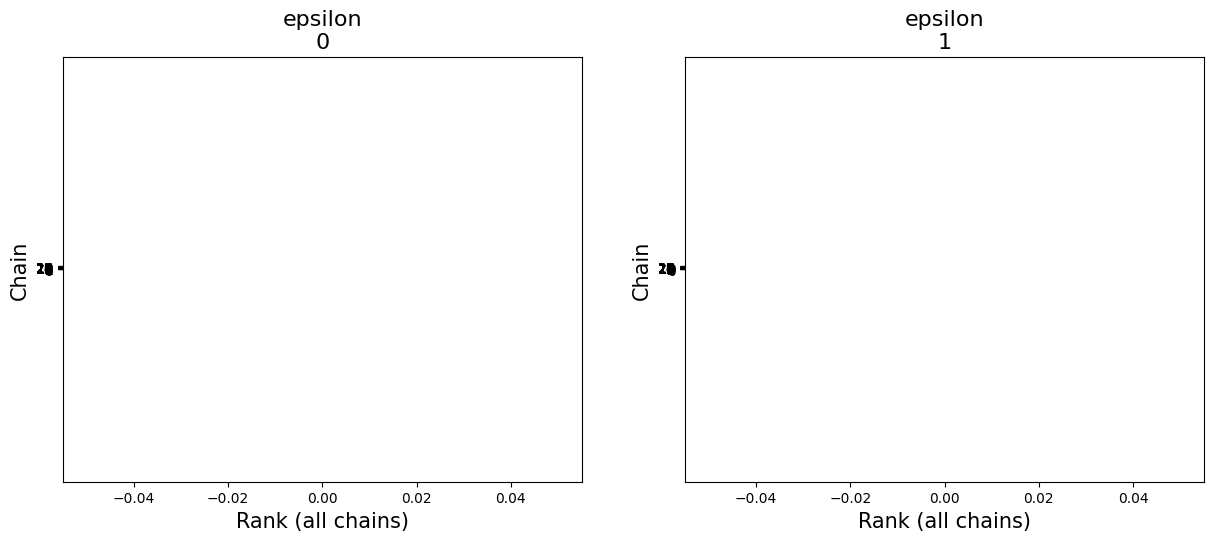

In [25]:
az.plot_autocorr(idata, var_names=["epsilon"]);
plt.show()

az.plot_rank(idata, var_names=["epsilon"]);
plt.show()
